#Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
import pickle

#Preprocessing Data

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
pth = '/content/drive/MyDrive/SIB Celerates/'

In [4]:
df = pd.read_csv(pth+'data_bersih.csv')
print(df.shape)
df.head()

(17922, 3)


,reviewContent,sentiment,corpus
0,mantap.. semoga awet barangnya.. maaf baru kas...,positif,mantap moga awet barang maaf kasih nilai
1,Seneng baranga cepat sampai packing juga rapih...,positif,senang baranga cepat packing rapi terima kasih
2,"Barang sampai dengan selamat,. berfungsi denga...",positif,barang selamat fungsi
3,Brg bagus cukup memuaskan,positif,barang bagus muas
4,Sesuai dengan pesanan,positif,sesuai pesan


In [5]:
df.isnull().sum()

,0
reviewContent,0
sentiment,0
corpus,70


In [6]:
df = df.dropna()
print(df.shape)
print(df.sentiment.value_counts())

(17852, 3)
sentiment
positif    8942
negatif    8910
Name: count, dtype: int64


In [7]:
#downsampling
num_sample = len(df[df.sentiment=='negatif'])
ds_positif_label = df[df.sentiment=='positif'].sample(n=num_sample, random_state=1)

In [8]:
df = pd.concat([ds_positif_label,df[df.sentiment=='negatif'].iloc[:num_sample]],axis=0)
print(df.shape)
print(df.sentiment.value_counts())

(17820, 3)
sentiment
positif    8910
negatif    8910
Name: count, dtype: int64


#Pembagian Dataset

In [9]:
x, y =df.corpus, df.sentiment

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(x_train)
X_test_vectorized = vectorizer.transform(x_test)

#Evaluate Model Machine Learning

## Algoritma Naive Bayes

In [12]:
st = time()

#Melatih model Naive Bayes
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)
print("[DONE] training process finished:",time()-st,"second(s)\n")

# Mengevaluasi model
y_pred = model.predict(X_test_vectorized)

class_report_nb = classification_report(y_test,y_pred)
conf_matrix_nb = confusion_matrix(y_test,y_pred)

print('Classification Report:\n', class_report_nb)

[DONE] training process finished: 0.2339005470275879 second(s)

Classification Report:
               precision    recall  f1-score   support

     negatif       0.89      0.91      0.90      1772
     positif       0.91      0.89      0.90      1792

    accuracy                           0.90      3564
   macro avg       0.90      0.90      0.90      3564
weighted avg       0.90      0.90      0.90      3564



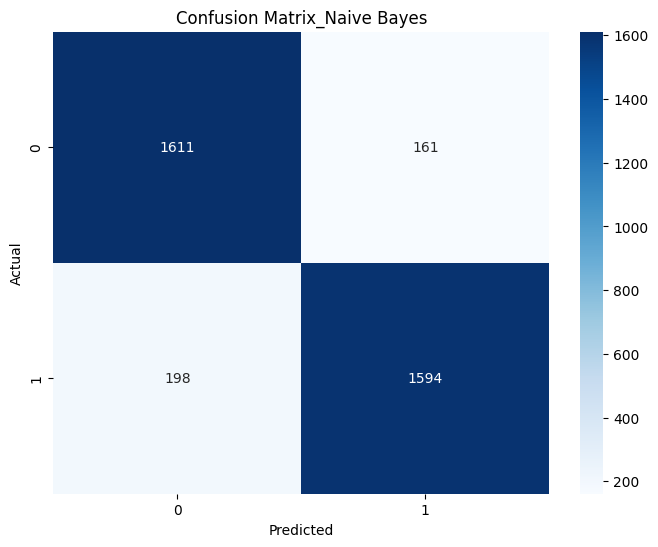

In [13]:
# Menampilkan Confusion Matrix dengan sns heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix_Naive Bayes')
plt.show()

# Testing Data

In [14]:
# Menyimpan model dan vectorizer
with open("/content/drive/MyDrive/SIB Celerates/naive_bayes_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)
with open("/content/drive/MyDrive/SIB Celerates/vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

In [21]:
# Uji dengan teks baru
text_input = input('Masukan teks baru: ')# Masukkan teks baru Anda
new_text = [text_input]
new_text_vectorized = vectorizer.transform(new_text)
prediction = model.predict(new_text_vectorized)
print(f"Prediksi untuk teks baru: {prediction}")

Masukan teks baru: barang tersebut tidak layak untuk dijual dengan kualitas yang buruk
Prediksi untuk teks baru: ['negatif']


#Save evaluation to txt

In [16]:
#save to txt, hasil dari Classification Report
report1 = class_report_nb

with open('classification_report.txt', 'w') as file:
    file.write("Classification Report\n")
    file.write(report1)